In [1]:

!pwd
#/tf/capstone2/src

/tf/capstone2/notebooks


In [2]:
cd ..

/tf/capstone2


In [3]:
cd src/

/tf/capstone2/src


In [4]:
from image_pipeline import *
from image_convolv import *
#from bc_plotting import *
from bc import *

In [5]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [6]:
#imgs = get_images()


In [7]:
root_dir = '../data/BreaKHis_v1/histology_slides/breast'
image_size = (153, 234, 3) # (456, 700, 3) # ( 153, 234, 3)

ip = read_images(root_dir, ['200X'])
ip.resize(shape = image_size)

first image shape (460, 700, 3)
first names entry SOB_B_A-14-22549AB-200-001.png
images_list should have list of 82 patients x images, filenames of shape 460 
first image shape (460, 700, 3)
images_filename_list should have list of 82 patients * images
first names entry SOB_B_A-14-22549AB-200-001.png
{'slide_id': '22549AB', 'seq': '001', 'tumor_class': 'B', 'year': '14', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'image_size': (460, 700, 3), 'mag': '200'}


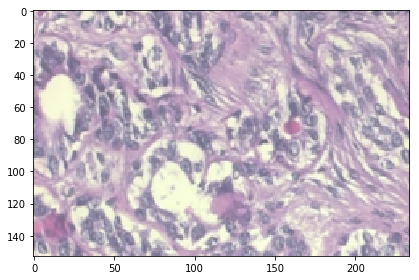

{'biopsy_procedure': 'SOB',
 'image_size': (460, 700, 3),
 'mag': '200',
 'seq': '001',
 'slide_id': '9133',
 'tumor_class': 'B',
 'tumor_type': 'F',
 'year': '14'}

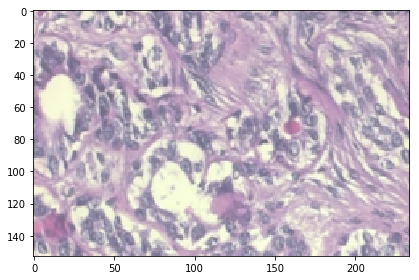

In [8]:
idx = 13
img1 = ip.get_image(idx)
io.imshow(img1)

ip.images_filename_list[idx]
ip.images_attributes[ip.images_filename_list[idx]]
# nice benign example

In [9]:
#imgs.keys()

In [10]:
#plot_images(imgs, save_title='question2.png', show = True)

In [11]:
ip.vectorize() 
ip.images_attributes

images_list len 82 
shape of np array converted images_list going in (82, 153, 234, 3)
features shape (82, 153, 234, 3)
attribs (dict) len 82
{'slide_id': '16196', 'seq': '001', 'tumor_class': 'M', 'year': '14', 'biopsy_procedure': 'SOB', 'tumor_type': 'LC', 'image_size': (460, 700, 3), 'mag': '200'}
{'slide_id': '4372', 'seq': '001', 'tumor_class': 'M', 'year': '14', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'image_size': (460, 700, 3), 'mag': '200'}
{'slide_id': '14015', 'seq': '001', 'tumor_class': 'M', 'year': '14', 'biopsy_procedure': 'SOB', 'tumor_type': 'DC', 'image_size': (460, 700, 3), 'mag': '200'}
{'slide_id': '16184', 'seq': '001', 'tumor_class': 'B', 'year': '14', 'biopsy_procedure': 'SOB', 'tumor_type': 'TA', 'image_size': (460, 700, 3), 'mag': '200'}
{'slide_id': '18842', 'seq': '001', 'tumor_class': 'M', 'year': '14', 'biopsy_procedure': 'SOB', 'tumor_type': 'MC', 'image_size': (460, 700, 3), 'mag': '200'}
tumor_class vector num malig 58 out of 82 samples


{'SOB_B_A-14-22549AB-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549AB',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549CD-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-22549G-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '22549G',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_A-14-29960CD-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '29960CD',
  'tumor_class': 'B',
  'tumor_type': 'A',
  'year': '14'},
 'SOB_B_F-14-14134-200-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (460, 700, 3),
  'mag': '200',
  'seq': '001',
  'slide_id': '14134',
  'tumor_cl

getting sample of type TA
found fn SOB_B_TA-14-16184-200-001.png at index [19]


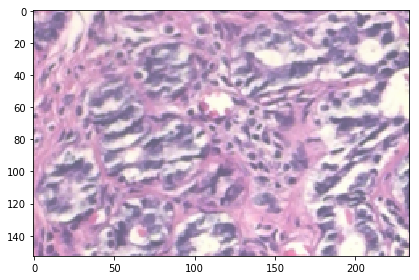

getting sample of type PT
found fn SOB_B_PT-14-29315EF-200-001.png at index [16]


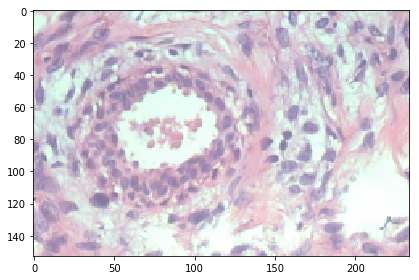

getting sample of type PC
found fn SOB_M_PC-14-15687B-200-001.png at index [77]


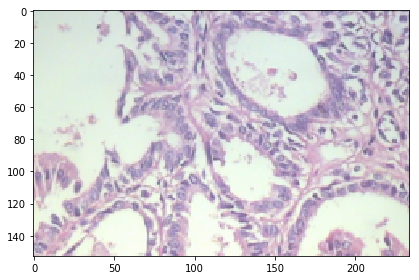

getting sample of type F
found fn SOB_B_F-14-29960AB-200-001.png at index [12]


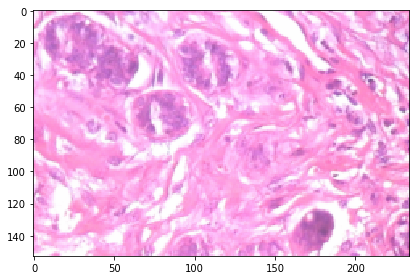

getting sample of type MC
found fn SOB_M_MC-14-18842-200-001.png at index [72]


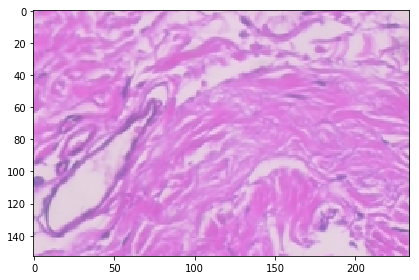

getting sample of type LC
found fn SOB_M_LC-14-16196-200-001.png at index [66]


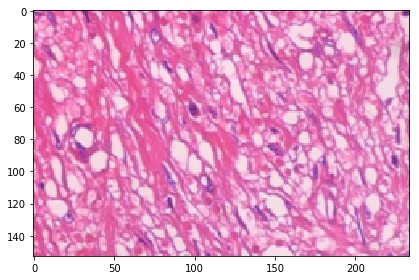

getting sample of type A
found fn SOB_B_A-14-22549CD-200-001.png at index [1]


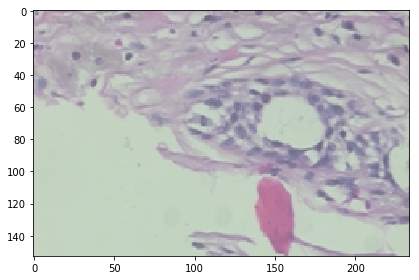

getting sample of type DC
found fn SOB_M_DC-14-4372-200-001.png at index [55]


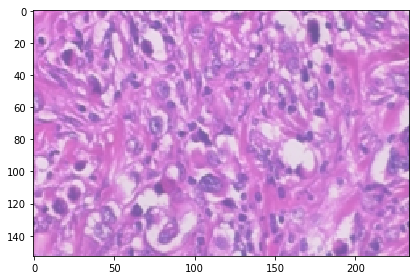

In [12]:
img_d8 = ip.get_one_of_each()

In [13]:
# get only the 4 malignant ones


getting sample of type A
found fn SOB_B_A-14-22549CD-200-001.png at index [1]


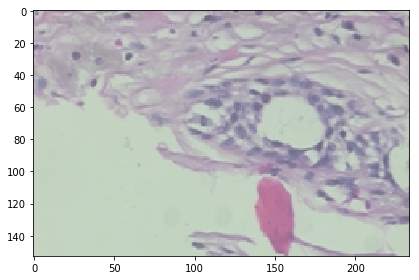

getting sample of type PT
found fn SOB_B_PT-14-29315EF-200-001.png at index [16]


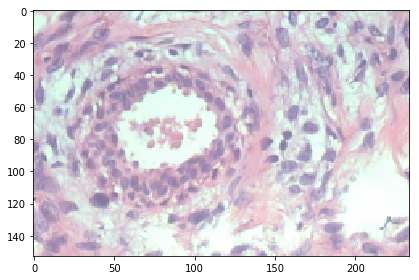

getting sample of type F
found fn SOB_B_F-14-29960AB-200-001.png at index [12]


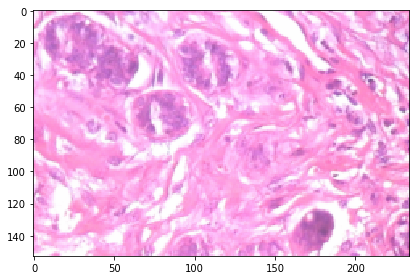

getting sample of type TA
found fn SOB_B_TA-14-16184-200-001.png at index [19]


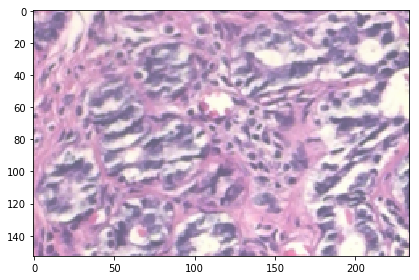

getting sample of type MC
found fn SOB_M_MC-14-18842-200-001.png at index [72]


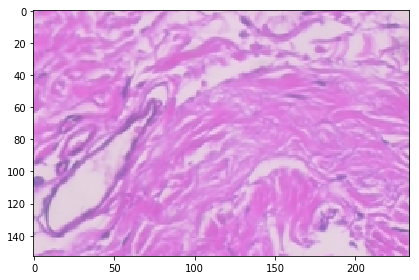

getting sample of type DC
found fn SOB_M_DC-14-4372-200-001.png at index [55]


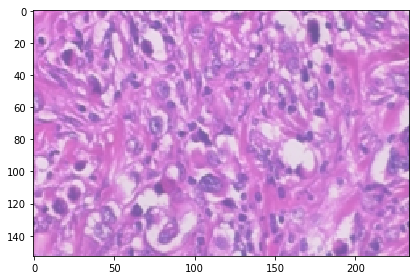

getting sample of type PC
found fn SOB_M_PC-14-15687B-200-001.png at index [77]


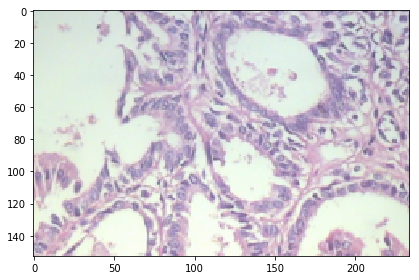

getting sample of type LC
found fn SOB_M_LC-14-16196-200-001.png at index [66]


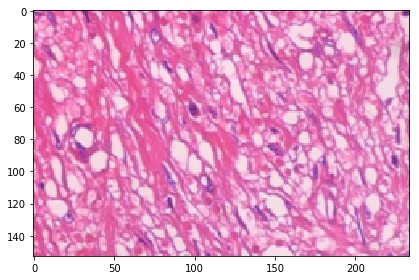

In [14]:

img_d_b = ip.get_one_of_each('B')
img_d_m = ip.get_one_of_each('M')

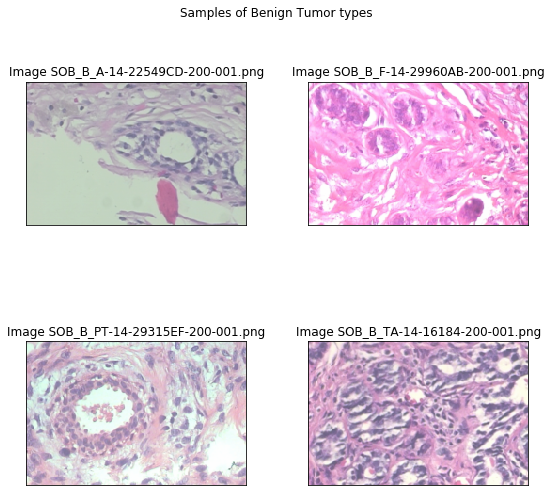

In [16]:
plot_images(img_d_b, Title='Samples of Benign Tumor types');

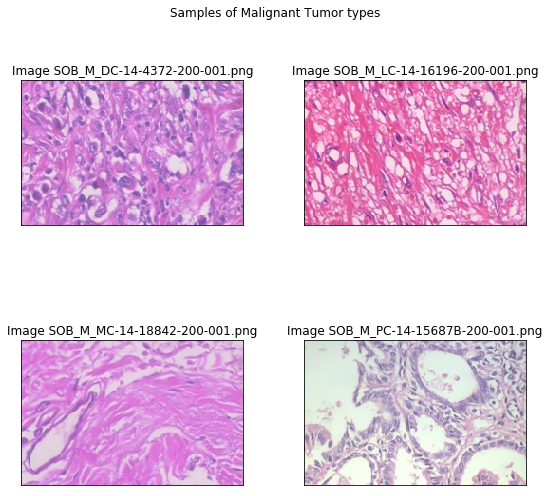

In [17]:
#tumor_types = {'DC', 'LC', 'MC', 'PC', 'A', 'F', 'PT', 'TA'}
plot_images(img_d_m, Title='Samples of Malignant Tumor types');

In [ ]:
#imgs_m = imgs[:4, :, :, :]
#plot_images(imgs_m, Title='Samples of Tumor types', labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT']);

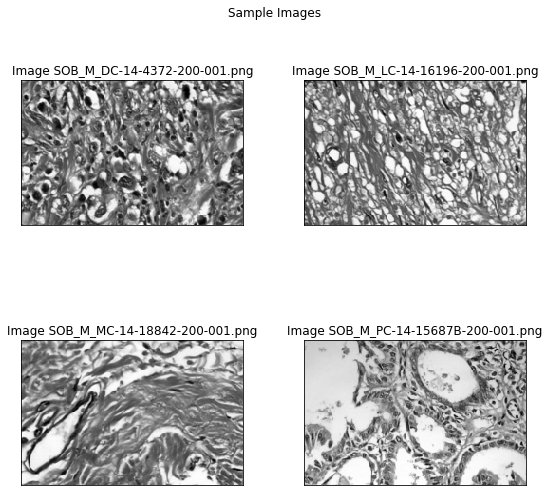

In [20]:

gray_imgs = get_grayscale(img_d_m)
plot_images(gray_imgs);

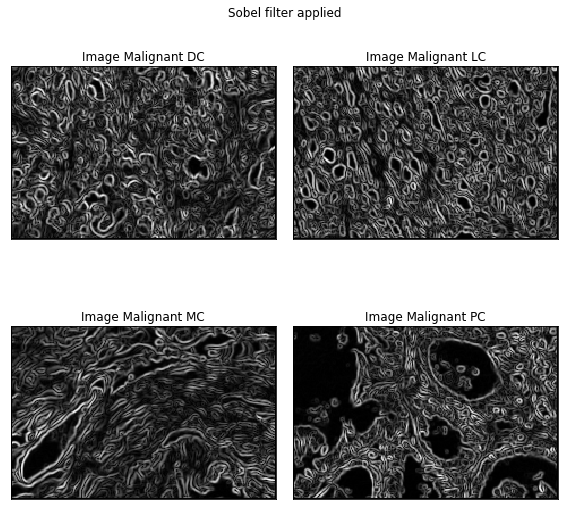

In [23]:

sobel_imgs = apply_filter(gray_imgs, img_filter = sobel, save_title='sobel_imgs.png', show_bool = False)
plot_images(sobel_imgs, Title = "Sobel filter applied", labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC']);

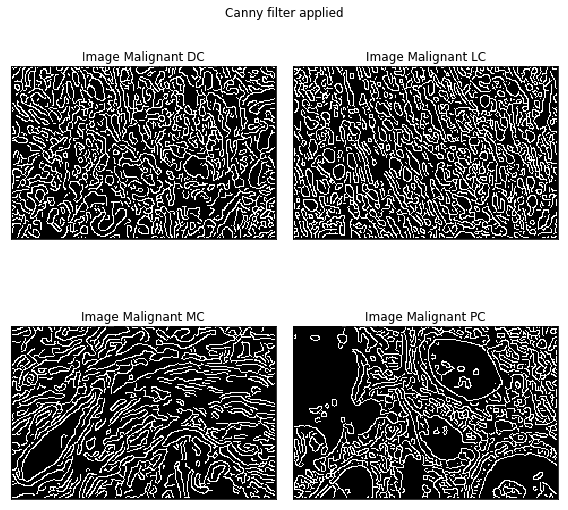

In [24]:
canny_imgs = apply_filter(gray_imgs, img_filter = canny, save_title='canny_imgs.png', show_bool = False)
plot_images(canny_imgs, Title = "Canny filter applied", labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC']);
# Not helpful b/c nuclei are lost

In [ ]:
test_canny_sigma(gray_imgs)

tv_chambolle denoising
Sigma, spatial: 0.3


<Figure size 432x288 with 0 Axes>

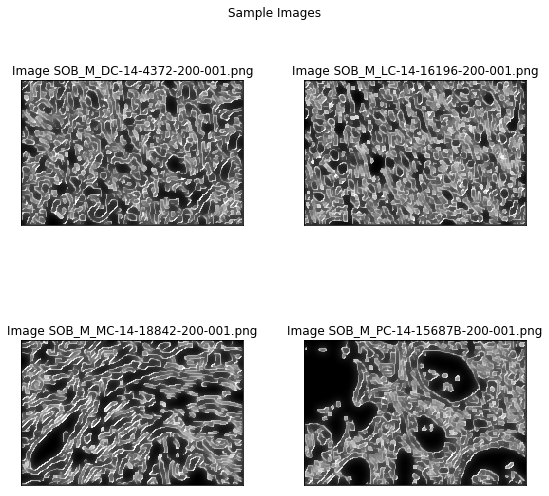

Sigma, spatial: 0.8400000000000001


<Figure size 432x288 with 0 Axes>

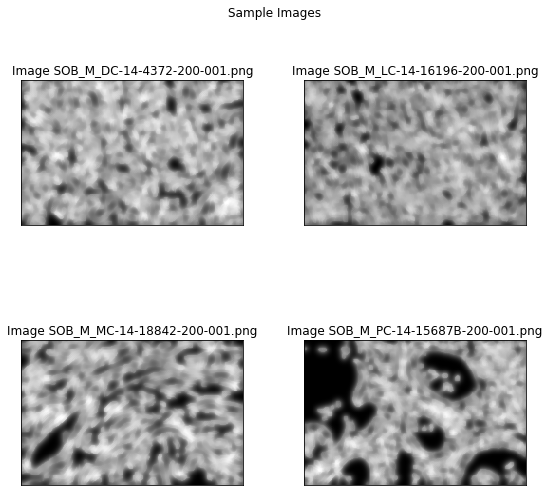

Sigma, spatial: 1.3800000000000001


<Figure size 432x288 with 0 Axes>

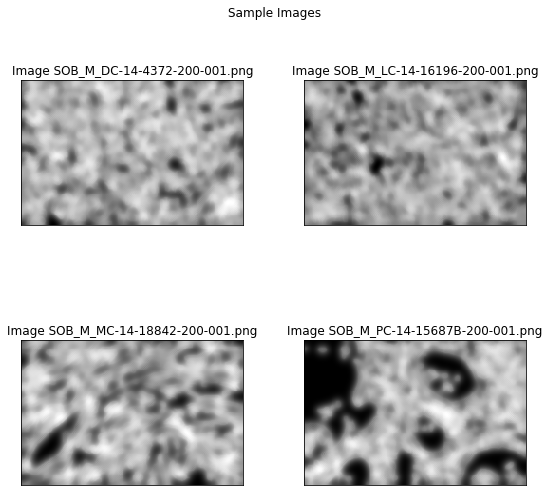

Sigma, spatial: 1.9200000000000002


<Figure size 432x288 with 0 Axes>

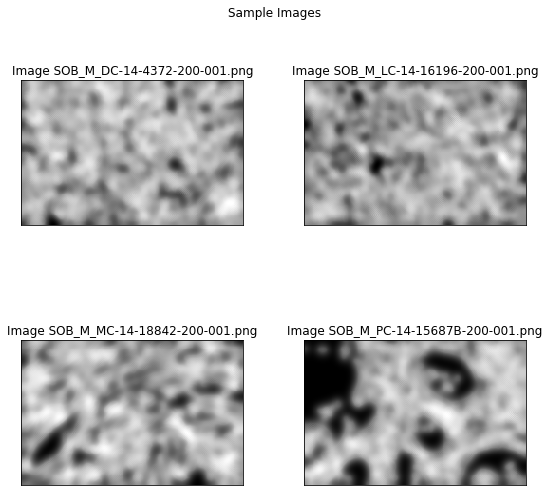

Sigma, spatial: 2.46


<Figure size 432x288 with 0 Axes>

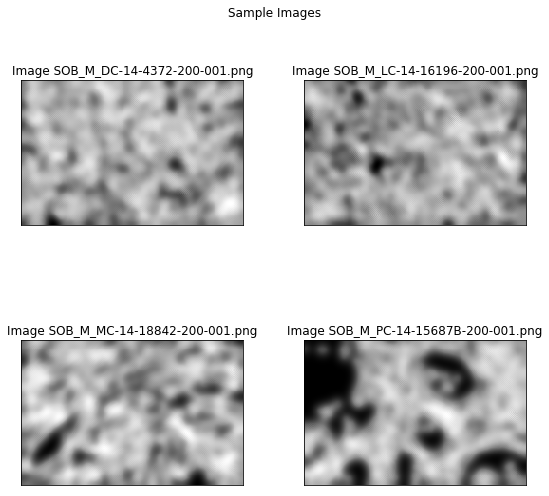

In [25]:
imgs_den = test_denoise(gray_imgs, denoise = denoise_tv_chambolle, save_title='denoise_chambolle.png', show_bool = True)
#tv_chambolle denoising
#Sigma 1, spatial: 0.3 is pretty nice

bilateral denoising
Sigma, spatial: 0.2


<Figure size 432x288 with 0 Axes>

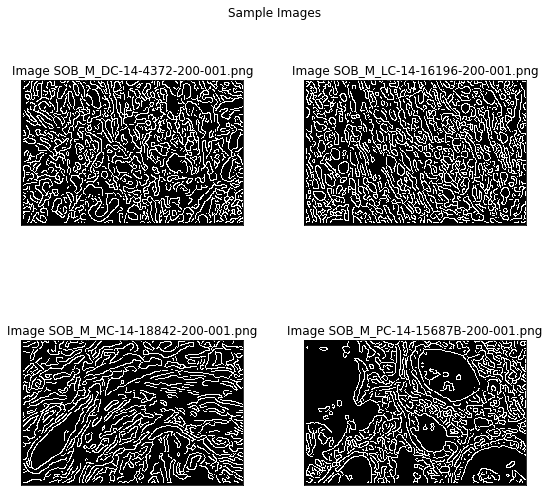

Sigma, spatial: 0.4


<Figure size 432x288 with 0 Axes>

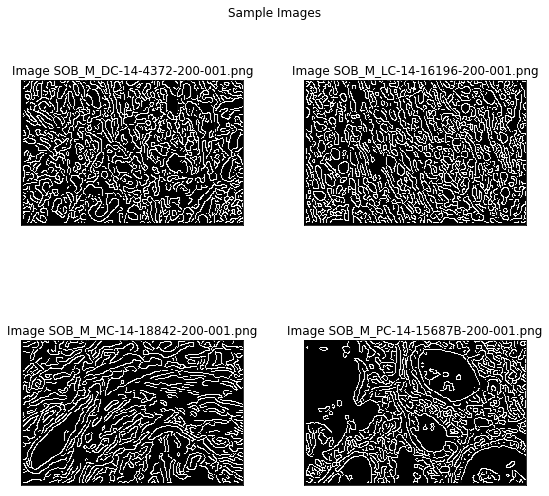

Sigma, spatial: 0.6000000000000001


<Figure size 432x288 with 0 Axes>

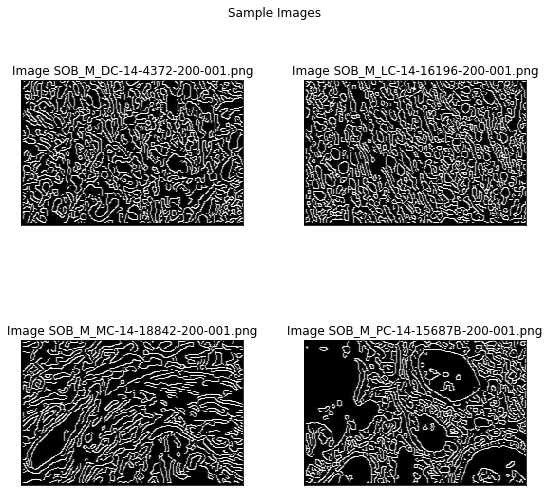

Sigma, spatial: 0.8


<Figure size 432x288 with 0 Axes>

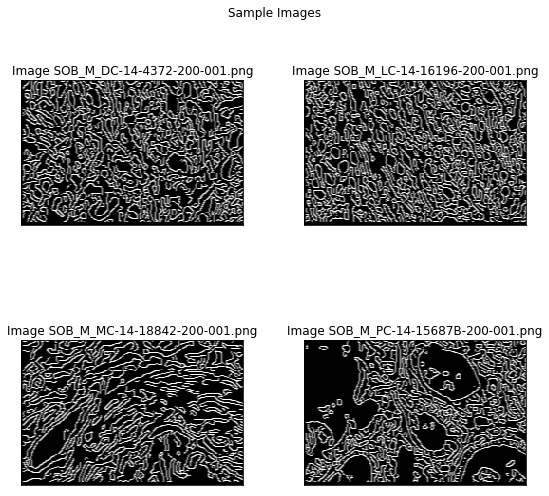

In [26]:
imgs_den_bilat = test_denoise(gray_imgs, denoise = denoise_bilateral, save_title='denoise_bilateral.png', show_bool = True)

# Looks like illustration

In [ ]:
plot_images(imgs_den, labels=['Malignant DC', 'Malignant MC', 'Benign A', 'Benign TA', 'Benign F', 'Malignant PC', 'Malignant LC', 'Benign PT'], Title = 'Denoised');



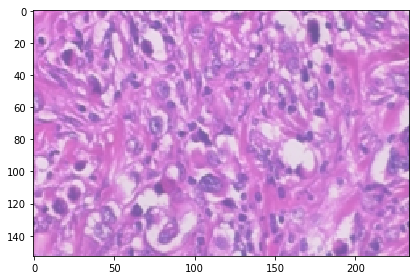

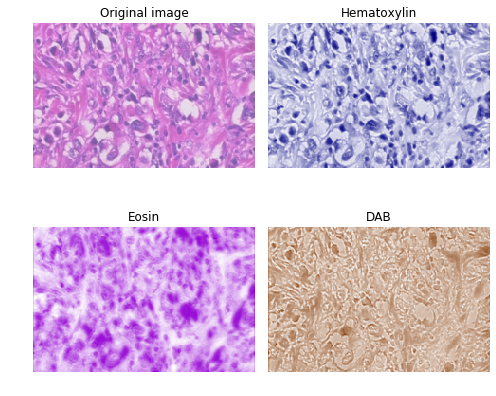

In [36]:
#imgs_bilat = test_denoise(gray_imgs, denoise = denoise_bilateral, save_title='denoise_bilateral.png', show_bool = True)
#single image dye sep
img_m1 = ip.get_image(ip.images_filename_list.index('SOB_M_DC-14-4372-200-001.png'))
ihc_hed = dye_color_separation(img_m1)


ax = plot_dye_separation(img_m1, ihc_hed)

W1203 23:54:48.548608 140400425772800 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1203 23:54:48.552723 140400425772800 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1203 23:54:48.557831 140400425772800 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1203 23:54:48.564195 140400425772800 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


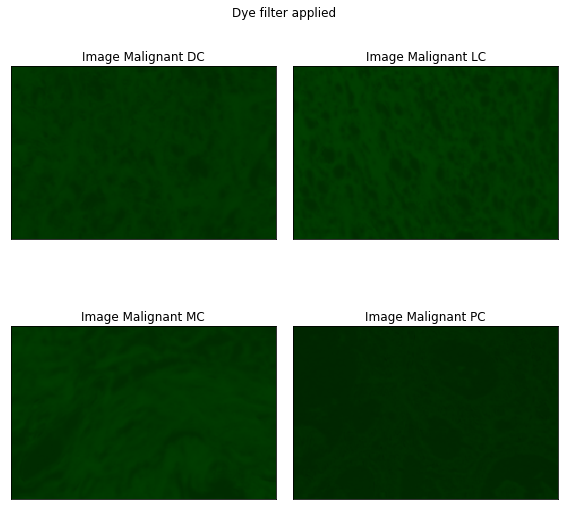

In [29]:
#dye_sep_imgs = apply_filter(img_d_m, img_filter = dye_color_separation, save_title='dye_imgs.png', show_bool = False)
#plot_images(dye_sep_imgs, Title = "Dye filter applied", labels=['Malignant DC', 'Malignant MC', 'Malignant PC', 'Malignant LC']);